# Solution to google hashcode challange 2018

https://storage.googleapis.com/coding-competitions.appspot.com/HC/2018/hashcode2018_qualification_task.pdf

## Task
Given a list of pre-booked rides in a city and a fleet of self-driving vehicles, assign the rides to vehicles, so
that riders get to their destinations on time.


For every ride that finishes on time (or early), you will earn points proportional to the distance of that ride;
plus an additional bonus if the ride also started precisely on time.


The first line of the input file contains the following integer numbers separated by single spaces:<br>
● R – number of rows of the grid (1 ≤ R ≤ 10000)<br>
● C – number of columns of the grid (1 ≤ C ≤ 10000)<br>
● F – number of vehicles in the fleet (1 ≤ F ≤ 1000)<br>
● N – number of rides (1 ≤ N ≤ 10000)<br>
● B – per-ride bonus for starting the ride on time (1 ≤ B ≤ 10000)<br>
● T – number of steps in the simulation (1 ≤ T ≤ 10 )<br>
<br>
N subsequent lines of the input file describe the individual rides, from ride 0 to ride N − 1 . Each line<br>
contains the following integer numbers separated by single spaces:<br>
● a – the row of the start intersection (0 ≤ a < R)<br>
● b – the column of the start intersection (0 ≤ b < C)<br>
● x – the row of the finish intersection (0 ≤ x < R)<br>
● y – the column of the finish intersection (0 ≤ y < C)<br>
● s – the earliest start(0 ≤ s < T)<br>
● f – the latest finish (0 ≤ f ≤ T) , (f ≥ s + |x − a| + |y − b|)<br>
○ note that f can be equal to T – this makes the latest finish equal to the end of the simulation<br>

For example file can look like this:<br>
3 4 2 3 2 10 3 rows, 4 columns, 2 vehicles, 3 rides, 2 bonus and 10 steps<br>
0 0 1 3 2 9 ride from [0, 0] to [1, 3], earliest start 2, latest finish 9<br>
1 2 1 0 0 9 ride from [1, 2] to [1, 0], earliest start 0, latest finish 9<br>
2 0 2 2 0 9 ride from [2, 0] to [2, 2], earliest start 0, latest finish 9<br>






In [1]:
# imports
import random
import numpy as np
from copy import deepcopy

import matplotlib.pyplot as plt

from deap import base, creator
from deap import tools
from deap import algorithms

In [2]:
# Reading from file 

file = open("./files/b_should_be_easy.in", "r")

data = np.loadtxt(file, delimiter=" ", dtype=np.int32).tolist()
print(data)


# Remove first row of list so only rides are left
rides = []

for i in range(1, len(data), 1):
    rides.append(data[i])

print(rides)
# type(rides)

[[800, 1000, 100, 300, 25, 25000], [395, 43, 296, 955, 244, 3620], [734, 467, 300, 833, 21919, 23595], [473, 815, 21, 810, 24428, 24959], [210, 150, 387, 12, 12646, 13491], [314, 563, 141, 419, 2744, 3381], [237, 432, 151, 805, 16506, 17940], [264, 491, 445, 767, 14518, 16078], [219, 215, 154, 449, 2806, 3698], [508, 681, 180, 701, 2744, 3179], [460, 585, 320, 715, 23246, 23518], [732, 600, 101, 985, 15613, 19024], [790, 935, 686, 121, 12617, 14630], [761, 85, 111, 567, 18517, 21011], [126, 185, 470, 739, 4056, 5036], [31, 325, 197, 802, 11368, 12202], [190, 614, 588, 972, 5453, 7904], [493, 783, 48, 358, 16842, 18899], [648, 494, 602, 487, 20154, 20301], [108, 973, 280, 646, 6209, 7780], [81, 766, 536, 544, 7102, 7835], [547, 716, 490, 315, 17725, 18263], [498, 128, 223, 589, 8084, 9741], [593, 508, 380, 466, 13853, 14535], [368, 900, 100, 744, 13935, 15080], [219, 277, 244, 256, 3766, 3905], [292, 766, 393, 28, 15583, 17315], [621, 39, 399, 117, 12206, 13006], [62, 406, 534, 169, 126

In [3]:
# Assigning variables
city_x = data[0][0]
city_y = data[0][1]
number_of_cars = data[0][2]
number_of_rides = data[0][3]
bonus = data[0][4]
steps = data[0][5]

print(number_of_cars)
print(number_of_rides)

100
300


In [4]:
# Creating object for storing configurations
toolbox = base.Toolbox()

In [5]:
# Configuring fitness and individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

1. Each individual has a lenght of number of rides
2. To each ride has assigned a car 

In [6]:
toolbox.register("attribute", random.randint, 0, number_of_cars-1)
# Number of attributes is equal to number of rides 
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute, n=number_of_rides)
toolbox.register("population", tools.initRepeat, list, toolbox.individual) 

In [7]:
# This is only for checking if that works
# A single individual is generated
ind = toolbox.individual()
print("Individual: ", ind)

# The population is initialised. It will have a total of X individuals. It is generated as a list of individuals.
pop = toolbox.population(n=5)

# The population is printed: 10 individuals of 5 genes each
print("Population: ",pop)

Individual:  [57, 0, 66, 81, 4, 88, 61, 71, 37, 78, 76, 44, 86, 57, 63, 9, 55, 11, 40, 45, 15, 29, 2, 95, 31, 21, 58, 13, 98, 71, 4, 48, 33, 62, 44, 79, 69, 91, 40, 25, 57, 46, 17, 95, 77, 82, 92, 29, 76, 9, 27, 62, 4, 29, 25, 70, 92, 94, 5, 19, 7, 34, 91, 59, 87, 85, 66, 2, 88, 95, 7, 39, 50, 46, 39, 74, 33, 97, 14, 62, 92, 66, 6, 74, 6, 19, 69, 16, 87, 64, 73, 42, 34, 92, 44, 15, 45, 3, 12, 45, 57, 89, 96, 25, 58, 28, 58, 30, 15, 25, 83, 46, 20, 13, 72, 39, 29, 23, 61, 37, 69, 52, 32, 45, 28, 13, 9, 90, 85, 52, 30, 93, 33, 86, 37, 11, 71, 16, 83, 50, 70, 58, 37, 33, 3, 7, 78, 76, 65, 80, 31, 58, 91, 88, 12, 5, 53, 10, 42, 81, 39, 21, 10, 18, 41, 95, 48, 36, 82, 37, 50, 75, 66, 33, 4, 73, 91, 39, 33, 63, 40, 20, 26, 9, 19, 97, 43, 61, 41, 31, 12, 93, 64, 89, 64, 9, 81, 29, 8, 42, 3, 97, 92, 14, 37, 10, 83, 75, 71, 41, 96, 69, 44, 43, 75, 64, 63, 93, 96, 44, 94, 64, 22, 36, 43, 54, 54, 33, 1, 38, 37, 73, 34, 77, 95, 15, 89, 2, 75, 41, 96, 51, 5, 21, 6, 23, 33, 80, 68, 68, 69, 51, 52, 0

### Fitness Function



#### Manhattan Distance

https://machinelearningmastery.com/distance-measures-for-machine-learning/

The Manhattan distance, also called the Taxicab distance or the City Block distance, calculates the distance between two real-valued vectors.

Manhattan distance is calculated as the sum of the absolute differences between the two vectors:
 - ManhattanDistance = sum for i to N sum |v1[i] – v2[i]|

In [8]:
def manhattan_distance(a, b):
    return sum(abs(e1-e2) for e1, e2 in zip(a,b))

In [9]:
# FOR LATER

class Car:
    def __init__(self):
        self.x = 0
        self.y = 0
        self.step = 0
        self.value = 0

In [10]:
# # FOR LATER
class Ride:
    def __init__(self):
        self.x = 0

In [11]:
# initialisation of the cars
cars = []
for i in range(0, number_of_cars+1, 1):
    cars.append([0] * 4)  

3 4 2 3 2 10 3 rows, 4 columns, 2 vehicles, 3 rides, 2 bonus and 10 steps<br>
0 0 1 3 2 9 ride from [0, 0] to [1, 3], earliest start 2, latest finish 9

In [12]:
def fitness(ind):

# ind = [0, 1, 2]
    
    # initialize cars
    # Car definition: [X, Y, Step, Value] 
#     cars = []
#     for i in range(0, number_of_cars+1, 1):
#         cars.append([0] * 4)   

#     print(cars)
    # keeps track of what ride are we 
    counter = 0

    for ride in rides:
#         print(ride)
#         print(ind)
        # choosing car for a ride from individual
    
        car = cars[ind[counter]]
#         print(ind[counter])

        # position of the car
        car_pos = [car[0], car[1]]
#         print("car_pos=", car_pos)

        # starting position of ride
        cord_start = [ride[0], ride[1]]
#         print("cord_start=", cord_start)

        # ending position of ride
        cord_end = [ride[2], ride[3]]
#         print("cord_end=", cord_end)

        # calculate distance between car and starting position
        dist_to_start = manhattan_distance(car_pos, cord_start)
#         print("dist_to_start=", dist_to_start)

        # adding distance needed to go to starting point to steps
        car[2] += dist_to_start

        # if car is on time or earlier add bonus
        if(car[2] <= ride[4]):
            car[3] += bonus

        # if car is earlier set to starting time
        if(car[2] < ride[4]):
#             print("car wait for step: ", ride[4])
            car[2] = ride[4]

        # calculate distance between starting point of the trip and 
        dist_trip = manhattan_distance(cord_start, cord_end)
#         print("dist_trip=", dist_trip)

        # add distance of the trip to steps
        car[2] += dist_trip

        # if steps needed to complete ride are less or equal to 
        # finish of ride add points
#         print("car accomplised ride in step: ", car[2])
#         print("ride was supose to end: ", ride[5])
        if(ride[5] > car[2]):
#             print("success")
            car[3] += dist_trip

        # set coordinates of the ending to the actual position
        # of the car
        car[0] = cord_end[0]
        car[1] = cord_end[1]

        cars[ind[counter]] = car
        counter += 1
#         print("===CARS===")
#         print(cars)
#         print("==================")
    
    value = 0
    for car in cars:
        value += car[3]
#     print("value=", value)
    
    return (value, )


In [13]:
# fitness([0, 1, 1, 0])

### Configure Genetic algorithms parameters

In [14]:
# we can experiment with different parameters 
toolbox.register("select", tools.selTournament, tournsize=3) # selections
toolbox.register("mate", tools.cxOnePoint)                   # crossing
toolbox.register("mutate", tools.mutFlipBit, indpb=0.2)      # mutation

# define how each individual will be evaluated
# fitness function defined above will be used 
toolbox.register("evaluate", fitness)

### Statistic configuration 

In [15]:
stats = tools.Statistics(lambda ind: ind.fitness.values) 
stats.register("avg", np.mean) 
stats.register("std", np.std) 
stats.register("min", np.min) 
stats.register("max", np.max) 

### Execution of the Algorithm

In [16]:
# The population is initialised with X individuals.
population = toolbox.population(n=50)
print(population)

# The algorithm that allows the evolution of the solutions is called
population, logbook = algorithms.eaSimple(population, toolbox, 
                                    cxpb=0.1, mutpb=0.2, # Probabilidades de cruce y mutacion
                                    ngen=50, verbose=False, stats=stats) # Numero de generaciones a completar y estadisticas a recoger

# For each generation, the logbook structure stores a summary of the algorithm's progress.
print("Results: ")
print(logbook)

print("Best Solution: ")
print(tools.selBest(population,1)[0])

[[91, 31, 95, 35, 15, 18, 3, 41, 71, 53, 25, 13, 49, 5, 61, 93, 50, 8, 90, 16, 8, 53, 35, 22, 64, 51, 5, 28, 48, 13, 87, 24, 0, 50, 58, 51, 1, 15, 26, 13, 27, 21, 18, 52, 76, 38, 28, 81, 42, 95, 39, 69, 41, 79, 14, 39, 56, 74, 16, 55, 56, 60, 38, 15, 44, 60, 89, 96, 10, 76, 95, 43, 95, 29, 90, 32, 93, 59, 41, 12, 52, 6, 14, 80, 35, 82, 59, 53, 79, 56, 92, 6, 35, 36, 6, 13, 92, 23, 71, 64, 21, 84, 68, 52, 75, 32, 58, 77, 13, 18, 96, 23, 29, 69, 22, 42, 85, 11, 81, 30, 87, 89, 13, 92, 7, 53, 19, 97, 40, 30, 2, 52, 38, 1, 55, 96, 81, 84, 23, 20, 76, 63, 70, 44, 54, 37, 79, 81, 58, 97, 39, 75, 77, 78, 18, 72, 60, 2, 75, 73, 86, 5, 55, 66, 38, 56, 40, 53, 3, 38, 72, 50, 63, 25, 51, 92, 84, 42, 20, 30, 79, 10, 43, 86, 46, 44, 58, 21, 22, 74, 1, 9, 74, 99, 53, 86, 8, 38, 82, 42, 99, 21, 77, 95, 62, 86, 25, 46, 45, 7, 37, 61, 70, 97, 49, 77, 46, 78, 10, 75, 39, 81, 74, 49, 64, 32, 25, 99, 79, 29, 57, 81, 14, 24, 46, 31, 18, 50, 18, 62, 33, 74, 72, 7, 66, 62, 35, 8, 41, 98, 34, 68, 93, 47, 20, 

Results: 
gen	nevals	avg   	std    	min   	max   
0  	50    	122615	4786.46	89727 	123435
1  	17    	123435	0      	123435	123435
2  	16    	123435	0      	123435	123435
3  	8     	123435	0      	123435	123435
4  	15    	123435	0      	123435	123435
5  	12    	123435	0      	123435	123435
6  	23    	123435	0      	123435	123435
7  	17    	123435	0      	123435	123435
8  	9     	123435	0      	123435	123435
9  	16    	123435	0      	123435	123435
10 	11    	123435	0      	123435	123435
11 	10    	123435	0      	123435	123435
12 	17    	123435	0      	123435	123435
13 	11    	123435	0      	123435	123435
14 	19    	123435	0      	123435	123435
15 	21    	123435	0      	123435	123435
16 	13    	123435	0      	123435	123435
17 	18    	123435	0      	123435	123435
18 	10    	123435	0      	123435	123435
19 	19    	123435	0      	123435	123435
20 	12    	123435	0      	123435	123435
21 	18    	123435	0      	123435	123435
22 	21    	123435	0      	123435	123435
23 	15    	123435	0      	1234

[]

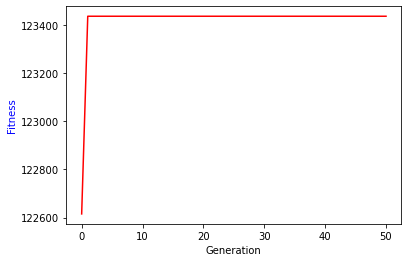

In [17]:
# Se recuperan los datos desde el log
gen = logbook.select("gen")
avgs = logbook.select("avg")
    
# Se establece una figura para dibujar
fig = plt.figure()
    
# Se representa la media del valor de fitness por cada generación
ax1 = plt.gca()
line1 = ax1.plot(gen, avgs, "r-", label="Average Fitness")    
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")

'''Note that additional information should be represented. For example, 
the maximum and minimum of that fitness are being collected in the statistics, 
although in the example they are not represented'''

plt.plot()